# Assignment 1: Uninformed Search

Pratik Warade

## Overview

Breadth-first and depth-first are two algorithms for performing
uninformed search---a search that does not use
knowledge about the goal of the search.  In this assignment, I implemented both
search algorithms in python and test them on a simple graph.

## Understanding Of Algorithms

In this jupyter notebook, I  implemented both of the following functions:

  * `breadthFirstSearch(startState, goalState, successorsf)` 
  * `depthFirstSearch(startState, goalState, successorsf)`
  
  
  
## Breadth First Search : 

Bfs is an AI search alggorithm use for finding solutions to a problem. BFS is used for trasversing graph data. In other words, it exhaustively searches the entire graph or sequence without considering the goal until it finds it. It does not use a heuristic algorithm. In AI world, various problems can be represented as graph. For example chess board game can be represented in graph form where node are the possible state of a player and edges represents moves such as moving forward, backward, etc. BFS is simple and effective. 

### BFS follows the following steps :

* Check the starting node and add its neighbours to the queue. 
* Mark the starting node as explored.
* Get the first node from the queue / remove it from the queue ..(3)
* Check if node has already been visited.
* If not, go through the neighbours of the node.
* Add the neighbour nodes to the queue.
* Mark the node as explored...(7)
* Loop through steps 3 to 7 until the queue is empty.








Each function receives as arguments the starting state, the goal state, and a successors function.  `breadthFirstSearch` returns the breadth-first solution path as a list of states starting with the `startState` and ending with the `goalState`.  `depthFirstSearch` returns the depth-first solution path.

Figure 1 – Breadth-first traversal on the state space denoted by a search tree. The root node is ‘A’ and the goal node is ‘F’.

<img src="http://digit.lk/old/sites/default/files/10_april_img/ai1.jpg">

The breadth-first traversal searches the tree in this order as depicted by the red arrows.
            
                                            Solution Path :  A->B->C->D->E->F
                                            

Advantages:-

* This uninformed search strategy can find the goal node where ever it is located in the search tree since it traverses the each node in a breadth-first manner until the goal node is reached. So we call this search strategy to be ‘Complete’ since it always guarantees that it finds the goal node at some level.
This finds the goal node is an optimal manner if each of the costs of traversing one node to the other is similar for the entire search tree.

Disadvantages:-

* Consumes lot of time – For example if the goal node is located at a depth of say 1000 in the tree, it has to traverse all the nodes until the depth 1000 to reach at that goal node which would be computationally very expensive. So BFS is not suitable for complex and large problems with a high order search tree.
Consumes lot of space – At each node it expands the nodes connected to it in the next depth level. Therefore, at each iteration it has to keep in memory all the nodes that have visited so far leading to a high requirement of memory. Therefore we can conclude that BFS has a high time complexity and space complexity.
                                           




## Depth First Search :

In the depth-first search (DFS) strategy, there is a clear distinction from the BFS. This always expands the deepest node in the search tree and goes along the depth of each node rather than across the breadth. Figure shown bellow show how DFS would works.Depth-first traversal on the state space denoted by a search tree. The root node is ‘A’ and the goal node is ‘F’.

<img src="http://digit.lk/old/sites/default/files/10_april_img/ai2.jpg">

The depth-first traversal searches the tree in this order as depicted by the blue arrows.

                                                    Solution Path :A->B->E->F



In this particular scenario, it can be clearly seen that DFS find the goal node in less number of steps when compared to BFS (There can be situations where this would not hold as well).
Advantages:-

* Better memory requirements – It only needs to store as single path from the root to leaf node, along the remaining unexpanded sibling nodes for each node in the path. Once a node has been traversed, it can be removed from the memory as soon as all its descendent nodes (immediate child and all other descendent nodes from that particular node – for example node B can be removed from memory once nodes E and F are traversed).

Disadvantages:-

* Does not give an optimal solution – This search strategy might make a wrong choice in the earlier stages of the searching and keep on moving along a very deep path (or even an infinite path) for a long time never realizing that the goal node is not in that path because it does not have heuristics to understand that. Therefore, DFS does not give an optimal solution.
Does not give a complete solution – If there is a left sub-tree with no goal node, which spans in depth for a long path, DFS would keep on going down and down never terminating leading to an incomplete solution(some content is taken from digit.lk).                                         


## Implementation of Algorithm

 The algorithm maintains a local variable named `unExpanded` to be a list
of nodes whose children have not yet been generated (like the authors'
`frontier` variable), and a dictionary named `expanded` to keep
the nodes for which we have generated the children (like the authors'
`explored` variable).  In each a node is stored with its parent,
allowing a solution path to be gaenerated be stepping backwards from
the goal node once it is found.

Given the `startState`, `goalState`, `successorsf`, and
`breadthFirst` (a boolean variable):
  * Initialize `expanded` to be an empty dictionary
  * Initialize `unExpanded` to be a list containing the pair `(startState, None)`
  * If `startState` is the `goalState`, return the list containing just `startState`
  * Repeat the following steps while `unExpanded` is not empty:
    * Pop from the end of `unExpanded` a (`state`, `parent`) pair.
    * Generate the `children` of `state` using the `successorsf` function.
    * Add `state: parent` to the `expanded` dictionary
    * For efficiency, remove from `children` any states that are already  in `expanded` or `unExpanded`.
    * If the goal has been found (in python, `goalState` is in `children`):
      * Initialize the solution path with the list `[state, goalState]`. 
      * While `parent` exists:
        * Insert `parent` to the front of the solution path.
        * Set `parent` to the parent of `parent`.
      * Return the solution path.
    * Sort and reverse the list of states in `children`, so that we all find the same solution paths.
    * Create a modified `children` list by changing each entry to be a pair (child, `parent`), where `parent` is the parent of the child.
    * Insert the modified `children` list into the `unExpanded` list at the front if doing breadth-first search, or at the back if doing depth-first search.

All imports required for program are listed in below cell

In [1]:
import time
from numpy import *
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import pylab as pylab
import numpy as np
from IPython import display
import copy

Following function implements common algorithm between BFS and DFS algorithm as shown in above description. 

In [2]:

def algo(startState, goalState, successorsf,breadthFirst):
    #1. intialiazing variables
    expanded={}
    unExpanded=[(startState,None)]
    #2. check is start state is goal state
    if (startState==goalState):
        return [startState]
        
    #3. if not then ..check till unexpanded is not empty
    while len(unExpanded)!=0:
        #3.1. get the current state
        currentState=unExpanded.pop()
        state=currentState[0]
        #3.2 get children of current state
        childState=successorsf(state)
        parent=state
        #3.3 Put them in expanded dictionary
        expanded[parent]=currentState[1]
      
        #3.4 To avoid circular path we delete state if present in expanded or unexpanded
        for i,j in unExpanded:
            for var in childState:
                if(i==var):    
                    childState.remove(i)
        for key,value in expanded.items():
            for var in childState:
                if key==var:
                    childState.remove(key)      
        
        #3.5 If goal is found..then build path
        if goalState in childState:
            #5.1 Create a list of current state and goalstate
            solutionPath=[state,goalState]
            #5.2 Get parent of parent until we found root node and return solution
            while parent:
                for i in expanded.keys():
                    if parent==i:
                       # temp=expanded[i]        
                        parent=expanded.get(i)
                if(parent==None):
                    continue
                solutionPath.insert(0,parent)            
             
            return solutionPath
        
        #3.6 If goal is not found, reverse list of state in childre to make sure same solution path is generated as in grade.py
        childState.reverse()
        #3.7. Create list of (child , parent)
        temp_list=[(x,parent) for x in childState]
        #3.8 Check weather breadthFirst is True if so, put unexpanded at back of temp list
        if breadthFirst == True:
            unExpanded=temp_list + unExpanded 
        #3.9 Check weather DepthFirst is Flase if so, put unexpanded at fornt of temp list    
        else:
            unExpanded=unExpanded  + temp_list
        #4.0 If there is no goal i.e unexpanded is 0
        if(len(unExpanded)==0):
            print("Goal Not found")  

Following two function call algo function with a boolean value breadthFirst either True for BFS or False for DFS

In [3]:
def breadthFirstSearch(startState, goalState, successorsf):
    breadthFirst=True
    solutionpath=algo(startState, goalState, successorsf,breadthFirst)
    return solutionpath
    

In [4]:
def depthFirstSearch(startState, goalState, successorsf):
    breadthFirst=False
    solutionpath=algo(startState, goalState, successorsf,breadthFirst)
    return solutionpath

# Example

Here is a simple example.  States are defined by lower case letters.  A dictionary stores a list of successor states for each state in the graph that has successors.

In [5]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

Following fuction is successor function to get the possible child from a particulare state. I take state as argument which then match with key in dictionary and using .copy copies all values corresponding to key which is then return in form of list.

In [6]:
def successorsf(state):
    return copy.copy(successors.get(state, []))

In [7]:
successorsf('e')

['k', 'l']

Let's get time required for each pass of BFS and DFS. To do this, I used time package and calculated time required to reach goal state.

In [8]:
print('Breadth-first')
start = time.clock()
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
timebfs_a= (time.clock() - start)
start = time.clock()
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
timebfs1_a_m= (time.clock() - start)
start = time.clock()
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))
timebfs2_a_z= (time.clock() - start)


Breadth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'd', 'z']


In [9]:
print('Depth-first')
start = time.clock()
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
timedfs_a= (time.clock() - start)
start = time.clock()
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
timedfs_a_m= (time.clock() - start)
start = time.clock()

print('path from a to z is', depthFirstSearch('a', 'z', successorsf))
timedfs_a_z= (time.clock() - start)

Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'b', 'e', 'k', 'z']


Following code, make a list of time in seconds and print that.

In [10]:
bfs_time=[timebfs_a*100000,timebfs1_a_m*100000,timebfs2_a_z*100000]
dfs_time=[timedfs_a*100000,timedfs_a_m*100000,timedfs_a_z*100000]
print(bfs_time)
print(dfs_time)

[21.787031071478722, 28.27182190431715, 22.720094500664107]
[21.973643757315642, 29.251538504961733, 25.14605941654549]


Now, we have list of time taken by BFS and DFS for particular example shown above. Lets, plot the graph using matplotlib.

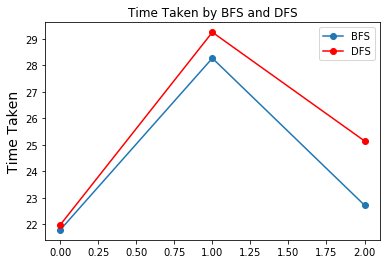

In [11]:
a = bfs_time
b = dfs_time
n=('a','b') #make tuple to pass in plot func
plt.xlabel(' ',fontsize=20)
plt.title('Time Taken by BFS and DFS')
plt.ylabel('Time Taken',fontsize=14)
plt.plot(a,'o-',label='BFS') # plotting a separately 
plt.plot(b,'or-',label='DFS') # plotting b separately
plt.legend()
plt.show()

From, the above graph it clearly shows that BFS is faster in terms of time. But it's not always. For example, if the goal node is present at 100th node then BFS will take more time as it will go on checking each node at each level.
Note: This graph may get changed as we run this notebook again.

Let's try a navigation problem around a grid of size 10 x 10.

Following fuction take the input state and returns all possible states.

In [12]:
def gridSuccessors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                succs.append( (newr, newc) )
    return succs

In [13]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [14]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [15]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [16]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))


Breadth-first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [17]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depthFirstSearch((0, 0), (9, 9), gridSuccessors))


Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)]


 Let's plot it the path

In [18]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

Now, we have the path to goal state. In bellow code, we first put all x value i.t 0th index in one list and y values of tuple in seperate two list so that we can get plot actual moves.

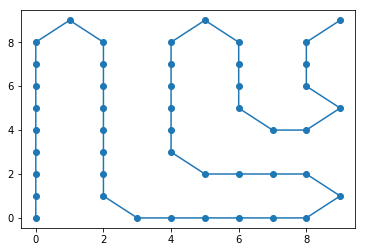

In [19]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [20]:
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

Now, we have the path to goal state. In bellow code, we first put all x value i.t 0th index in one list and y values of tuple in seperate two list so that we can get plot actual moves.

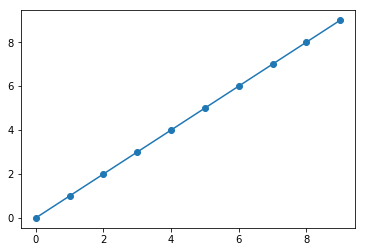

In [21]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

 By looking at the both graph for 8-puzzle game, DFS finds the solution with lesser number of moves in that case, the goal state is far below ( in terms of levels in graph ). Also, this can also sometime delays DFS algorithm. To avoid this kind of situation  limited search algorithms are used.

In [22]:
depthFirstSearch((0, 0), (9, 20), gridSuccessors)

Goal Not found


# Extra Credit

I used both the function to solve the Camels Puzzle, described at [Logic Puzzles](http://www.folj.com/puzzles/).


To do that, we need to get child of each states. Following function calculates the move accoriding to rules specified in above link. Firstly, calculate the index of blank i.e ' ' and then we match patterns of  previous and it's previous position of camel with reference of ' ' and vice versa.

In [23]:
def move_L(state,index,index_f):
    #print("moving L")
    lst = list(state)
    lst[index+1] = ' '
    temp=state[index+1]
    lst[index] = temp
    t = tuple(lst)
    return t
    
def move_L(state,index,index_f):
    #print("moving L")
    lst = list(state)
    lst[index+1] = ' '
    temp=state[index+1]
    lst[index] = temp
    t = tuple(lst)
    return t   
    
    
def move_R(state,index,index_f):
   # print("moving L")
    lst = list(state)
    lst[index-1] = ' '
    temp=state[index-1]
    lst[index] = temp
    t = tuple(lst)
    return t

def jump_L(state,index,index_ff):
   # print("Jumping L")
    lst = list(state)
    lst[index_ff] = ' '
    temp=state[index_ff]
    lst[index] = temp
    t = tuple(lst)
    return t

def jump_R(state,index,index_bb):
   # print("Jumping L")
    lst = list(state)
    lst[index_bb] = ' '
    temp=state[index_bb]
    lst[index] = temp
    t = tuple(lst)
    return t  
    
    
def move_R(state,index,index_f):
   # print("moving L")
    lst = list(state)
    lst[index-1] = ' '
    temp=state[index-1]
    lst[index] = temp
    t = tuple(lst)
    return t

def jump_L(state,index,index_ff):
   # print("Jumping L")
    lst = list(state)
    lst[index_ff] = ' '
    temp=state[index_ff]
    lst[index] = temp
    t = tuple(lst)
    return t

def jump_R(state,index,index_bb):
   # print("Jumping L")
    lst = list(state)
    lst[index_bb] = ' '
    temp=state[index_bb]
    lst[index] = temp
    t = tuple(lst)
    return t

In [24]:
def camelSuccessorsf(state):
    final=[]
    if(' ' in state ):
            #getting index of blank and its corresponding indexes
            index=state.index(' ')
            index_f= index+1
            index_ff=index+2
            index_b=index-1
            index_bb=index-2
            # conditions to handle ('R','R','R','R','L','L','L','L',' ')
            if(index==8 ):
                index_f=index
                index_ff=index
            # conditions to handle (' ','R','R','R','L','L','L','L','R')
            elif(index==0):
                index_bb=index
                index_b=index
            # conditions to handle ('R','R','R','R','L','L','L',' ','L')    
            elif(index==7 and state[index_f]=='L' ):
                index_ff=index+1
            # conditions to handle ('R','R','R','R','L','L','L',' ','R')  
            elif(index==7 and state[index_f]=='R' ):
                index_ff=index+1
            # conditions to handle ('R',' ','R','R','L','L','L','L','R')  
            elif(index==1 and index_b=='R'):
                index_bb=index-1
            
            
            # once condition  are checked.. time to move camels
             # conditions to handle ('R','R','R','R',' ','L','L','L','L')  
            if(state[index_f]=='L' and state[index_ff]=='L'):
                t=move_L(state,index,index_f)
                final.append((t))
            # conditions to handle ('R','R','R','R',' ','L','L','L','L') 
            if(state[index_b]=='R' and state[index_bb]=='R'):
                t1=move_R(state,index,index_f)
                final.append((t1))
            # conditions to handle ('R','R','R','L',' ','R','L','L','L') 
            if(state[index_f]=='R' and state[index_ff]=='L'):
                t3=jump_L(state,index,index_ff)
                final.append((t3))
            # conditions to handle ('R','R','R','L',' ','R','L','L','L') 
            if(state[index_b]=='L' and state[index_bb]=='R'):
                t4=jump_R(state,index,index_bb)
                final.append((t4))
            # conditions to handle ('R','R','R','L',' ','L','R','L','L') 
            if(state[index_f]=='L' and state[index_ff]=='R'):
                t5=move_L(state,index,index_bb)
                final.append((t5))
            # conditions to handle ('R','R','L','R',' ','R','L','L','L') 
            if(state[index_b]=='R' and state[index_bb]=='L'):
                t6=move_R(state,index,index_bb)
                final.append((t6))
            # conditions to handle (' ','R','R','L','R','R','L','L','L') &
            # conditions to handle ('R','R','R','L','R','R','L','L',' ')
            if(state[0]==' ' or state[8]==' '):
                return final
            if(index==8 or index==0):
                return final
    return(final)

In [25]:
camelStartState=('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')

In [26]:
camelGoalState=('L', 'L', 'L', 'L', ' ', 'R', 'R', 'R', 'R')

In [27]:
camelSuccessorsf(camelStartState)

[('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L'),
 ('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')]

In [28]:
children = camelSuccessorsf(camelStartState)
print(children[0])
camelSuccessorsf(children[0])

('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L')


[('R', 'R', 'R', 'R', 'L', 'L', ' ', 'L', 'L'),
 ('R', 'R', 'R', ' ', 'L', 'R', 'L', 'L', 'L')]

Let us now print the solution by calling bfs and printing each of values in solution path.

In [29]:
bfs = breadthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Breadth-first solution: (', len(bfs), 'steps)')
for s in bfs:
    print(s)
    
dfs = depthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Depth-first solution: (', len(dfs), 'steps)')
for s in dfs:
    print(s)



Breadth-first solution: ( 25 steps)
('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L')
('R', 'R', 'R', ' ', 'L', 'R', 'L', 'L', 'L')
('R', 'R', ' ', 'R', 'L', 'R', 'L', 'L', 'L')
('R', 'R', 'L', 'R', ' ', 'R', 'L', 'L', 'L')
('R', 'R', 'L', 'R', 'L', 'R', ' ', 'L', 'L')
('R', 'R', 'L', 'R', 'L', 'R', 'L', ' ', 'L')
('R', 'R', 'L', 'R', 'L', ' ', 'L', 'R', 'L')
('R', 'R', 'L', ' ', 'L', 'R', 'L', 'R', 'L')
('R', ' ', 'L', 'R', 'L', 'R', 'L', 'R', 'L')
(' ', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L')
('L', 'R', ' ', 'R', 'L', 'R', 'L', 'R', 'L')
('L', 'R', 'L', 'R', ' ', 'R', 'L', 'R', 'L')
('L', 'R', 'L', 'R', 'L', 'R', ' ', 'R', 'L')
('L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', ' ')
('L', 'R', 'L', 'R', 'L', 'R', 'L', ' ', 'R')
('L', 'R', 'L', 'R', 'L', ' ', 'L', 'R', 'R')
('L', 'R', 'L', ' ', 'L', 'R', 'L', 'R', 'R')
('L', ' ', 'L', 'R', 'L', 'R', 'L', 'R', 'R')
('L', 'L', ' ', 'R', 'L', 'R', 'L', 'R', 'R')
('L', 'L', 'L', 'R', ' ', 'R', 'L', 'R', 'R'

In [30]:
path = breadthFirstSearch(camelStartState,camelGoalState , camelSuccessorsf)

In below cell, I plot the solution for a problem which is dynamic graph showing moves at x-axis.

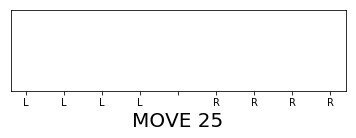

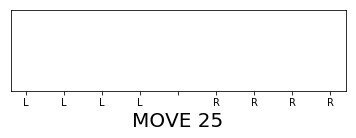

In [31]:

for i in range(0,len(bfs)):
    x = range(0,9)
    z=range(0,26)
    #plt.plot(x)
    pylab.xticks(x, path[i])
    ax = pylab.gca()
    ax.yaxis.set_visible(False)
    pylab.plot(x,' ')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.05)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.60)
    i=i+1 #increment i value to get actual move count
    plt.xlabel('MOVE %d' %i,fontsize=20)
    # plt.ylabel('Number of Steps',fontsize=20)
    display.clear_output(wait=True)
    display.display(pl.gcf())    
    time.sleep(2.0)
    

* Problems :
* While solving extra credit,because of confusing camels moves it took time to find pattern and debug where I went wrong. Later, I made modular code which inturn help to skip debugging some part of code

 

In [32]:
%run -i A1grader.py

Searching this graph:
 {'a': ['b'], 'b': ['c', 'd'], 'c': ['e'], 'd': ['f', 'i'], 'e': ['g', 'h', 'i']}
Looking for path from a to b.
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b']
Looking for path from a to i.
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b', 'd', 'i']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b', 'c', 'e', 'i']

C:\Users\waradepratik Grade is 80/100
Up to 20 more points will be given based on the qualty of your descriptions of the method and the results.


In [33]:
successors = {'d': ['y'], 'b': ['a'], 'a': ['b', 'z', 'd'], 'e': ['z'], 'y': ['z']}


In [34]:

print('path from a to a is', breadthFirstSearch('a', 'y', successorsf))
print('path from a to a is', depthFirstSearch('a', 'y', successorsf))

path from a to a is ['a', 'd', 'y']
path from a to a is ['a', 'd', 'y']
